In [22]:
import pandas as pd 
import scipy.stats as stats
import numpy as np

In [23]:
sbest = """0.78881988 0.81055901 0.76708075 0.83540373 0.79503106 0.81055901
 0.80124224 0.83850932 0.75776398 0.7694704  0.77329193 0.80434783
 0.81677019 0.7515528  0.77950311 0.82919255 0.79503106 0.77639752
 0.79503106 0.80373832 0.77950311 0.79813665 0.86335404 0.77639752
 0.77950311 0.76708075 0.79813665 0.79192547 0.7515528  0.82242991
 0.78881988 0.78881988 0.80124224 0.77950311 0.80434783 0.78881988
 0.81677019 0.77329193 0.78571429 0.80685358 0.79813665 0.78571429
 0.77639752 0.8136646  0.77329193 0.83850932 0.8136646  0.77018634
 0.80434783 0.80685358"""  # ('budget', 'screen_count', 'like_ratio', 'view_count', 'polarity_sia')


sBase = """0.79192547 0.75776398 0.75776398 0.81677019 0.77329193 0.77950311
 0.77639752 0.8136646  0.76708075 0.76323988 0.78881988 0.82608696
 0.80434783 0.77950311 0.7826087  0.80434783 0.77329193 0.76708075
 0.73913043 0.76635514 0.77018634 0.81055901 0.81987578 0.7484472
 0.79813665 0.79192547 0.79813665 0.77950311 0.74534161 0.81308411
 0.80745342 0.80124224 0.82608696 0.72981366 0.78881988 0.76397516
 0.79813665 0.77329193 0.77018634 0.77570093 0.80434783 0.75465839
 0.77329193 0.80124224 0.7484472  0.8136646  0.78571429 0.75465839
 0.80434783 0.79439252""" # ('budget', 'screen_count')

In [29]:
best = [float(s) for s in sbest.split()]
base = [float(s) for s in sBase.split()]
results = pd.DataFrame({'base': base, 'best': best})

In [30]:
results.describe()

,base,best
count,50.000000,50.000000
mean,0.783473,0.794845
std,0.023776,0.023300
min,0.729814,0.751553
25%,0.767081,0.777174
50%,0.781056,0.795031
75%,0.803571,0.806854
max,0.826087,0.863354


### Check Outliers

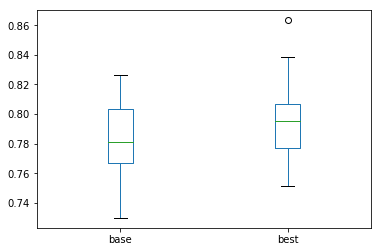

In [40]:
from scipy import stats
import matplotlib.pyplot as plt

results[['base', 'best']].plot(kind='box')
plt.savefig('boxplot_outliers.png')
plt.show()

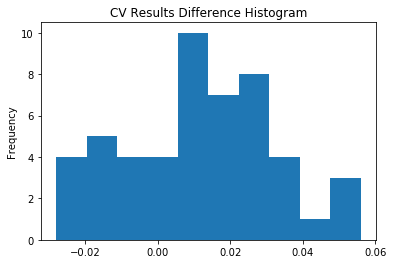

In [34]:
results['diff'] = results['best'] - results['base']
results['diff'].plot(kind='hist', title= 'CV Results Difference Histogram')
plt.savefig('cv results difference histogram.png')
plt.show()

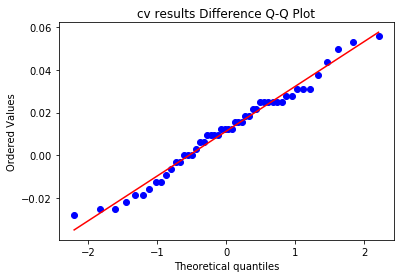

In [35]:
stats.probplot(results['diff'], plot= plt)
plt.title('cv results Difference Q-Q Plot')
plt.savefig('cv results difference qq plot.png')
plt.show()

There is some deviation from normality, but it does not appear to be severe so there is no need to worry. To be sure, let’s test this statistically to see if the data is normally distributed. To test this, one can use the Shapiro-Wilk test for normality. The first value is the W test value, and the second value it the p-value.

In [36]:
stats.shapiro(results['diff'])

(0.9784467220306396, 0.48847609758377075)

The test was non-significant. Therefore, the difference between the two conditions is normally distributed. If this test were to be significant, an appropriate alternative to use would be the Wilcoxon signed-rank Test.

In [37]:
stats.ttest_rel(results['base'], results['best'])

Ttest_relResult(statistic=-3.9161704878896217, pvalue=0.00027837221051350006)

The p value returned (0.0002783) is lower than threshold 'a' (0.05). Thus the null hypothesis is rejected and we argue that 'Best' performance is significantly different and improved compared to the 'Base' performance of features.